# Modelling Greenspace Metrics

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pygam import LinearGAM, s
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#! pip install pygam

## 1. Modelling greenspace metrics at 100m

In [3]:
# load greenspace metrics at 100m geodataframe
gdf_100 = gpd.read_file("thesis_project/output/greenspace_metrics_100_gm.json")
gdf_100.head()

,NDVI_100,Greenspace%_100,Canopy%_100,geometry
0,0.604345,0.601428,0.188163,POINT (366247.996 408833.065)
1,0.488456,0.465199,0.479434,POINT (385813.833 395579.780)
2,0.692624,0.805473,0.205100,POINT (386030.989 413487.405)
3,0.456658,0.837002,0.114089,POINT (358245.324 404183.111)
4,0.466913,0.389054,0.269682,POINT (378537.192 392738.452)


### 1.1. How does NDVI predict Greenspace%?

#### 1.1.1. Linear Regression Model

In [55]:
# data/predictors as the NDVI_100
df_100 = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# target as Greenspace%_100
target_100 = pd.DataFrame(gdf_100, columns=['Greenspace%_100'])

# define X and y
X = df_100
y = target_100['Greenspace%_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_100 = linear_model.LinearRegression()
model_100 = lm_100.fit(X_train,y_train)

In [56]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_100 (or slope):', model_100.coef_)
print('Intercept:', model_100.intercept_)
print('R-squared:', model_100.score(X_train,y_train))

Coefficient of NDVI_100 (or slope): [1.40352637]
Intercept: -0.15549657891201918
R-squared: 0.6806489209777122


In [57]:
# make predictions
y_pred = model_100.predict(X_test)

# compare actual values with predicted ones
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values
X_test = X_test.iloc[:, 0:1].values

In [58]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.10836987631358297
Mean Squared Error: 0.023276392656485897
Root Mean Squared Error: 0.15256602720293236


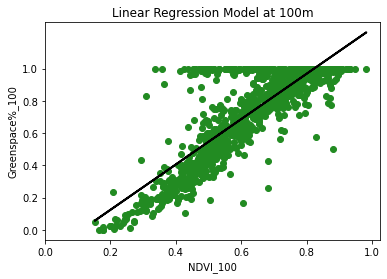

In [59]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Linear Regression Model at 100m')
plt.xlabel('NDVI_100')
plt.ylabel('Greenspace%_100')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lm_ndvi_green_100_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [64]:
# predict Greenspace%_100 values for NDVI equalt to 0.3
X_t_0 = [[0.3]]
y_t_0 = model_100.predict(X_t_0)
print(model_100.predict(X_t_0))

[0.26556133]


/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [65]:
# predict Greenspace%_100 values for NDVI equalt to 0.4
X_t_1 = [[0.4]]
y_t_1 = model_100.predict(X_t_1)
print(model_100.predict(X_t_1))

[0.40591397]


/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [70]:
# how does Greenspace%_100 increase if NDVI goes from 0.3 to 0.4?
#print('Greenspace%_100 increase if NDVI goes from 0.3 to 0.4:', y_t_1 - y_t_0)
print('If NDVI goes from 0.3 to 0.4, Greenspace%_100 increases by:', y_t_1 - y_t_0)

If NDVI goes from 0.3 to 0.4, Greenspace%_100 increases by: [0.14035264]


#### 1.1.2. Generalized Additive Model (GAM)

In [9]:
# data/predictors as the NDVI_100
df_100 = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# target as Greenspace%_100
target_100 = pd.DataFrame(gdf_100, columns=['Greenspace%_100'])

# define X and Y
X = df_100
y = target_100['Greenspace%_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit GAM model
#gam_100 = LinearGAM(s(0, n_splines=25)).fit(X_train, y_train, weights=None)
gam_100 = LinearGAM(s(0)).fit(X_train, y_train, weights=None)

# check model statistics
gam_100.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     14.6836
Link Function:                     IdentityLink Log Likelihood:                                -91244.4771
Number of Samples:                         4702 AIC:                                           182520.3214
                                                AICc:                                          182520.4331
                                                GCV:                                                0.0225
                                                Scale:                                              0.0224
                                                Pseudo R-Squared:                                   0.7088
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3446/198064715.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100.summary()


In [10]:
# plot outpus
#XX = gam_100.generate_X_grid(term=0)
#plt.rcParams['figure.figsize'] = (8, 8)
#fig, axs = plt.subplots(1, 1)
#titles = ['Generalized Additive Model (GAM) at 100m']
#pdep, confi = gam_100.partial_dependence(XX, term=0, features = 1, width=0.95)
#ax.plot(XX[:, 1], pdep)
#ax.plot(XX[:, 1], confi[0][:, 0], c='grey', ls='--')
#ax.plot(XX[:, 1], confi[0][:, 1], c='grey', ls='--')
#ax.set_title(titles, fontsize=26)
#plt.show()

In [11]:
# convert X_test and y_test to array values
#y_test = y_test.iloc[:, 0:1].values
X_test = X_test.iloc[:, 0:1].values

# make predictions
y_pred = gam_100.predict(X_test)

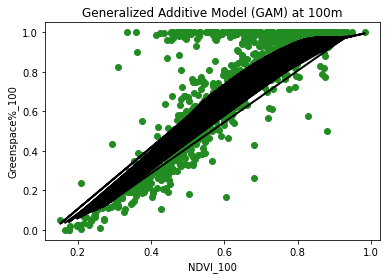

In [12]:
# plot output
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

# set title, xlabel and ylabel
plt.title('Generalized Additive Model (GAM) at 100m')
plt.xlabel('NDVI_100')
plt.ylabel('Greenspace%_100')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_green_100_plot.png', dpi=300, bbox_inches='tight')

plt.show()

### 1.2. How does NDVI predict Canopy%?

#### 1.2.1. Linear Regression Model

In [13]:
# NDVI_100 as the predictor
df = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# Canopy%_100 as the target
target = pd.DataFrame(gdf_100, columns=['Canopy%_100'])

# define X and y
X = df
y = target['Canopy%_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_100 = linear_model.LinearRegression()
model_100 = lm_100.fit(X_train,y_train)

In [14]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_100 (or slope):', model_100.coef_)
print('Intercept:', model_100.intercept_)
print('R-squared:', model_100.score(X_train,y_train))

Coefficient of NDVI_100 (or slope): [-0.00423051]
Intercept: 0.1809361967159148
R-squared: 2.01803862752703e-05


In [15]:
# make predictions
y_pred = model_100.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [16]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11901758336671131
Mean Squared Error: 0.022477426490116144
Root Mean Squared Error: 0.14992473608486406


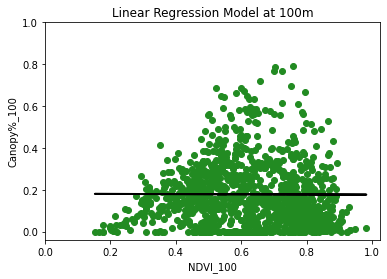

In [17]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Linear Regression Model at 100m')
plt.xlabel('NDVI_100')
plt.ylabel('Canopy%_100')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lm_ndvi_canopy_100_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 1.2.2. Generalized Additive Model (GAM)

In [18]:
# data/predictors as the NDVI_100
df = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# target as Canopy%_100
target = pd.DataFrame(gdf_100, columns=['Canopy%_100'])

# define X and Y
X = df
y = target['Canopy%_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit GAM model
#gam_100 = LinearGAM(s(0, n_splines=25)).fit(X_train, y_train, weights=None)
gam_100 = LinearGAM(s(0)).fit(X_train, y_train, weights=None)

# check model statistics
gam_100.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     14.6836
Link Function:                     IdentityLink Log Likelihood:                                -94317.7117
Number of Samples:                         4702 AIC:                                           188666.7905
                                                AICc:                                          188666.9022
                                                GCV:                                                0.0218
                                                Scale:                                              0.0217
                                                Pseudo R-Squared:                                   0.0781
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3446/881848350.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_100.summary()


In [19]:
# convert X_test and y_test to array values
#y_test = y_test.iloc[:, 0:1].values
X_test = X_test.iloc[:, 0:1].values

# make predictions
y_pred = gam_100.predict(X_test)

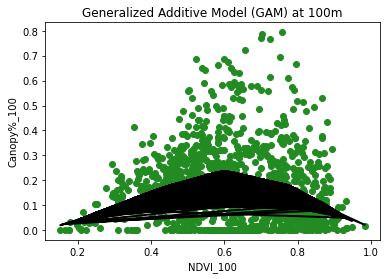

In [20]:
# plot output
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

# set title, xlabel and ylabel
plt.title('Generalized Additive Model (GAM) at 100m')
plt.xlabel('NDVI_100')
plt.ylabel('Canopy%_100')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_canopy_100_plot.png', dpi=300, bbox_inches='tight')

plt.show()

## 2. Modelling greenspace metrics at 300m

In [21]:
# load greenspace metrics at 300m geodataframe
gdf_300 = gpd.read_file("thesis_project/output/greenspace_metrics_300_gm.json")
gdf_300.head()

,NDVI_300,Greenspace%_300,Canopy%_300,geometry
0,0.485173,0.528844,0.442425,POINT (384713.357 394255.209)
1,0.285426,0.293025,0.247789,POINT (387034.589 396075.398)
2,0.462789,0.462798,0.464153,POINT (395300.134 404726.178)
3,0.594440,0.987531,0.225635,POINT (369879.786 397440.240)
4,0.584577,0.532749,0.220658,POINT (356385.617 406274.434)


### 2.1. How does NDVI predict Greenspace%?

#### 2.1.1. Linear Regression Model

In [22]:
# NDVI_300 as the predictor
df = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# Greenspace%_300 as the target
target = pd.DataFrame(gdf_300, columns=['Greenspace%_300'])

# define X and y
X = df
y = target['Greenspace%_300']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_300 = linear_model.LinearRegression()
model_300 = lm_300.fit(X_train,y_train)

In [23]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_300 (or slope):', model_300.coef_)
print('Intercept:', model_300.intercept_)
print('R-squared:', model_300.score(X_train,y_train))

Coefficient of NDVI_300 (or slope): [1.1359718]
Intercept: 0.02219447548085196
R-squared: 0.6921249306453257


In [24]:
# make predictions
y_pred = model_300.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [25]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08934573648402441
Mean Squared Error: 0.01610827472555938
Root Mean Squared Error: 0.1269183782025258


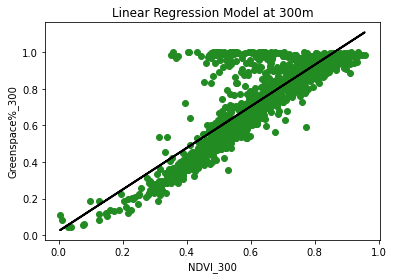

In [26]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Linear Regression Model at 300m')
plt.xlabel('NDVI_300')
plt.ylabel('Greenspace%_300')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lm_ndvi_green_300_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 2.1.2. Generalized Additive Model (GAM)

In [27]:
# data/predictors as the NDVI_300
df_300 = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# target as Greenspace%_300
target_300 = pd.DataFrame(gdf_300, columns=['Greenspace%_300'])

# define X and Y
X = df_300
y = target_300['Greenspace%_300']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit GAM model
#gam_300 = LinearGAM(s(0, n_splines=25)).fit(X_train, y_train, weights=None)
gam_300 = LinearGAM(s(0)).fit(X_train, y_train, weights=None)

# check model statistics
gam_300.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     15.2801
Link Function:                     IdentityLink Log Likelihood:                               -134374.2796
Number of Samples:                         4624 AIC:                                           268781.1194
                                                AICc:                                          268781.2415
                                                GCV:                                                0.0155
                                                Scale:                                              0.0154
                                                Pseudo R-Squared:                                   0.7175
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3446/847380652.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_300.summary()


In [28]:
# convert X_test and y_test to array values
#y_test = y_test.iloc[:, 0:1].values
X_test = X_test.iloc[:, 0:1].values

# make predictions
y_pred = gam_300.predict(X_test)

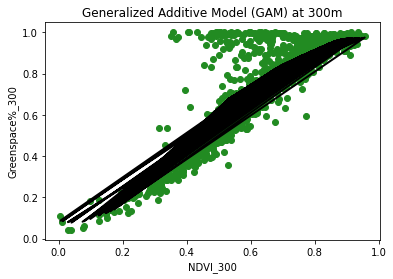

In [29]:
# plot output
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

# set title, xlabel and ylabel
plt.title('Generalized Additive Model (GAM) at 300m')
plt.xlabel('NDVI_300')
plt.ylabel('Greenspace%_300')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_green_300_plot.png', dpi=300, bbox_inches='tight')

plt.show()

### 2.2. How does NDVI predict Canopy%?

#### 2.2.1. Linear Regression Model

In [30]:
# NDVI_300 as the predictor
df = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# Canopy%_300 as the target
target = pd.DataFrame(gdf_300, columns=['Canopy%_300'])

# define X and y
X = df
y = target['Canopy%_300']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_300 = linear_model.LinearRegression()
model_300 = lm_300.fit(X_train,y_train)

In [31]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_300 (or slope):', model_300.coef_)
print('Intercept:', model_300.intercept_)
print('R-squared:', model_300.score(X_train,y_train))

Coefficient of NDVI_300 (or slope): [-0.08080014]
Intercept: 0.2886264074760401
R-squared: 0.007596799374733454


In [32]:
# make predictions
y_pred = model_300.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [33]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.12067054159879056
Mean Squared Error: 0.025458426372861536
Root Mean Squared Error: 0.1595569690513753


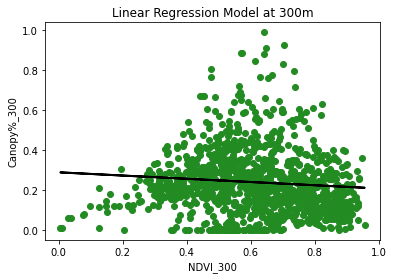

In [34]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Linear Regression Model at 300m')
plt.xlabel('NDVI_300')
plt.ylabel('Canopy%_300')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lm_ndvi_canopy_300_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 2.2.2. Generalized Additive Model (GAM)

In [35]:
# data/predictors as the NDVI_300
df_300 = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# target as Greenspace%_300
target_300 = pd.DataFrame(gdf_300, columns=['Canopy%_300'])

# define X and Y
X = df_300
y = target_300['Canopy%_300']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit GAM model
#gam_300 = LinearGAM(s(0, n_splines=25)).fit(X_train, y_train, weights=None)
gam_300 = LinearGAM(s(0)).fit(X_train, y_train, weights=None)

# check model statistics
gam_300.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     15.2801
Link Function:                     IdentityLink Log Likelihood:                                -85309.1359
Number of Samples:                         4624 AIC:                                           170650.8319
                                                AICc:                                          170650.9541
                                                GCV:                                                0.0236
                                                Scale:                                              0.0234
                                                Pseudo R-Squared:                                   0.0697
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3446/407199068.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_300.summary()


In [36]:
# convert X_test and y_test to array values
#y_test = y_test.iloc[:, 0:1].values
X_test = X_test.iloc[:, 0:1].values

# make predictions
y_pred = gam_300.predict(X_test)

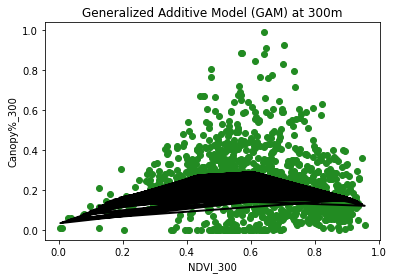

In [37]:
# plot output
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

# set title, xlabel and ylabel
plt.title('Generalized Additive Model (GAM) at 300m')
plt.xlabel('NDVI_300')
plt.ylabel('Canopy%_300')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_canopy_300_plot.png', dpi=300, bbox_inches='tight')

plt.show()

## 3. Modelling greenspace metrics at 500m

In [38]:
# load greenspace metrics at 500m geodataframe
gdf_500 = gpd.read_file("thesis_project/output/greenspace_metrics_500_gm.json")
gdf_500.head()

,NDVI_500,Greenspace%_500,Canopy%_500,geometry
0,0.502140,0.485566,0.339339,POINT (372673.972 394848.116)
1,0.634665,0.641850,0.181328,POINT (383073.527 408838.647)
2,0.606910,0.969945,0.164166,POINT (372549.883 390299.040)
3,0.719913,0.824603,0.294875,POINT (372644.583 414079.514)
4,0.710023,0.980069,0.031487,POINT (369449.827 413462.285)


### 3.1. How does NDVI predict Greenspace%?

#### 3.1.1. Linear Regression Model

In [39]:
# NDVI_500 as the predictor
df = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# Greenspace%_300 as the target
target = pd.DataFrame(gdf_500, columns=['Greenspace%_500'])

# define X and y
X = df
y = target['Greenspace%_500']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_500 = linear_model.LinearRegression()
model_500 = lm_500.fit(X_train,y_train)

In [40]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_500 (or slope):', model_500.coef_)
print('Intercept:', model_500.intercept_)
print('R-squared:', model_500.score(X_train,y_train))

Coefficient of NDVI_500 (or slope): [1.10297259]
Intercept: 0.016788191733490554
R-squared: 0.6732817510651916


In [41]:
# make predictions
y_pred = model_500.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [42]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08462592877548988
Mean Squared Error: 0.015352208136519737
Root Mean Squared Error: 0.12390402792693923


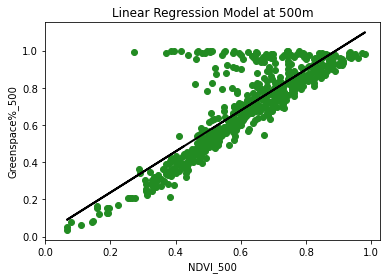

In [43]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Linear Regression Model at 500m')
plt.xlabel('NDVI_500')
plt.ylabel('Greenspace%_500')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lm_ndvi_green_500_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 3.1.2. Generalized Additive Model (GAM)

In [44]:
# data/predictors as the NDVI_500
df = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# target as Greenspace%_500
target = pd.DataFrame(gdf_500, columns=['Greenspace%_500'])

# define X and Y
X = df
y = target['Greenspace%_500']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit GAM model
#gam_500 = LinearGAM(s(0, n_splines=25)).fit(X_train, y_train, weights=None)
gam_500 = LinearGAM(s(0)).fit(X_train, y_train, weights=None)

# check model statistics
gam_500.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     14.1664
Link Function:                     IdentityLink Log Likelihood:                                -68119.7645
Number of Samples:                         2304 AIC:                                           136269.8617
                                                AICc:                                          136270.0761
                                                GCV:                                                0.0153
                                                Scale:                                              0.0151
                                                Pseudo R-Squared:                                   0.6972
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3446/2741797941.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_500.summary()


In [45]:
# convert X_test and y_test to array values
#y_test = y_test.iloc[:, 0:1].values
X_test = X_test.iloc[:, 0:1].values

# make predictions
y_pred = gam_500.predict(X_test)

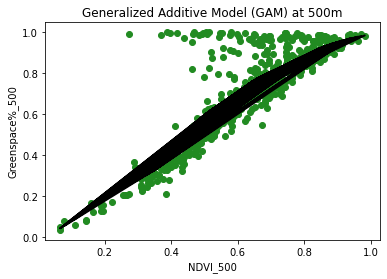

In [46]:
# plot output
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

# set title, xlabel and ylabel
plt.title('Generalized Additive Model (GAM) at 500m')
plt.xlabel('NDVI_500')
plt.ylabel('Greenspace%_500')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_green_500_plot.png', dpi=300, bbox_inches='tight')

plt.show()

### 3.2. How does NDVI predict Canopy%?

#### 3.2.1. Linear Regression Model

In [47]:
# NDVI_500 as the predictor
df = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# Greenspace%_300 as the target
target = pd.DataFrame(gdf_500, columns=['Canopy%_500'])

# define X and y
X = df
y = target['Canopy%_500']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_500 = linear_model.LinearRegression()
model_500 = lm_500.fit(X_train,y_train)

In [48]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_500 (or slope):', model_500.coef_)
print('Intercept:', model_500.intercept_)
print('R-squared:', model_500.score(X_train,y_train))

Coefficient of NDVI_500 (or slope): [-0.124209]
Intercept: 0.3495300528153746
R-squared: 0.015580297735448112


In [49]:
# make predictions
y_pred = model_500.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [50]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.12753937170726817
Mean Squared Error: 0.02723193709975635
Root Mean Squared Error: 0.16502102017548054


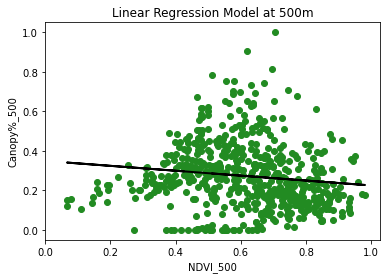

In [51]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Linear Regression Model at 500m')
plt.xlabel('NDVI_500')
plt.ylabel('Canopy%_500')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lm_ndvi_canopy_500_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 3.2.2. Generalized Additive Model (GAM)

In [52]:
# data/predictors as the NDVI_500
df = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# target as Canopy%_500
target = pd.DataFrame(gdf_500, columns=['Canopy%_500'])

# define X and Y
X = df
y = target['Canopy%_500']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit GAM model
#gam_500 = LinearGAM(s(0, n_splines=25)).fit(X_train, y_train, weights=None)
gam_500 = LinearGAM(s(0)).fit(X_train, y_train, weights=None)

# check model statistics
gam_500.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     14.1664
Link Function:                     IdentityLink Log Likelihood:                                -37870.1711
Number of Samples:                         2304 AIC:                                            75770.6749
                                                AICc:                                           75770.8893
                                                GCV:                                                0.0262
                                                Scale:                                              0.0259
                                                Pseudo R-Squared:                                   0.0535
Feature Function                  Lam

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/pygam/pygam.py:752: RuntimeWarning: invalid value encountered in reciprocal
  np.fill_diagonal(Dinv, d**-1) # invert the singular values
/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3446/1293848242.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_500.summary()


In [53]:
# convert X_test and y_test to array values
#y_test = y_test.iloc[:, 0:1].values
X_test = X_test.iloc[:, 0:1].values

# make predictions
y_pred = gam_500.predict(X_test)

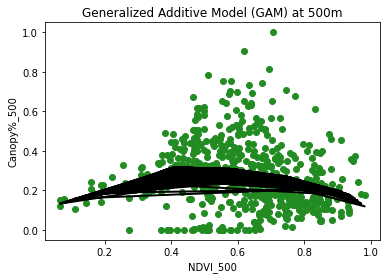

In [54]:
# plot output
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

# set title, xlabel and ylabel
plt.title('Generalized Additive Model (GAM) at 500m')
plt.xlabel('NDVI_500')
plt.ylabel('Canopy%_500')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_canopy_500_plot.png', dpi=300, bbox_inches='tight')

plt.show()